# Part 1: Sigmoid

### Load Data

In [1]:
# !pwd
# !ls datasets/

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# save file path to the data
data_path = "datasets/sigmoid_cycle/sigmoid_cycle.npy"

# load the data into a numpy array
sigmoid_pictures = np.load(data_path)

print(sigmoid_pictures.shape)

(4320, 32, 32, 3)


4320 pictures with 32x32 resolution with RGB (3 channel) color coding

### Explore Data

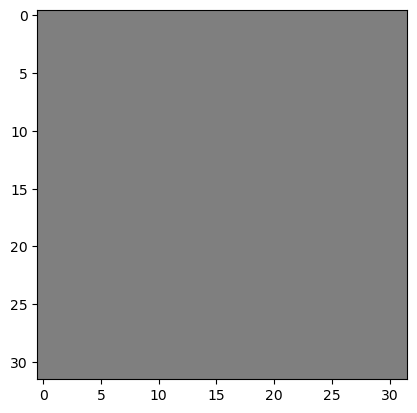

In [3]:
plt.imshow(sigmoid_pictures[2520]) # change 0 to 1,2,3,...,4320 to find the transition image

### Prepare Labels

In [4]:
n = 4320 # how many pictures we have (from the array.shape output before)
selected = 2520 # change this to the transition value you found previously

labels = np.array([0]*selected + [1]*(n-selected)) # we will explain this

print(labels)

[0 0 0 ... 1 1 1]


### Define Network

In [5]:
import tensorflow as tf
def get_model():

  # defining input layer
  inputs = tf.keras.Input(shape=(32, 32, 3), name="simple_model")
  x0 = tf.keras.layers.Flatten()(inputs)

  # hidden layers 80 nodes each
  x1 = tf.keras.layers.Dense(80, activation="relu")(x0)
  x2 = tf.keras.layers.Dense(80, activation="relu")(x1)

  # single node output
  outputs = tf.keras.layers.Dense(1, name="predictions")(x2)  # linear activation!

  # create model according to defined layers
  model = tf.keras.Model(inputs=inputs, outputs=outputs, name=f'Model')

  # some details about what type of loss function and optimization method
  model.compile(
      optimizer=tf.keras.optimizers.Adam(),
      loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  return model

model = get_model()
model.summary()

Model: "Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_model (InputLayer)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 80)             │       245,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,401 (985.94 KB)

 Trainable params: 252,401 (985.94 KB)

 Non-trainable params: 0 (0.00 B)

### Train Network

In [6]:
# training network according to labels created from defined cutoff value
model_log = model.fit(x=sigmoid_pictures, y=labels, epochs=5)

Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9814 - loss: 7.9531
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9956 - loss: 2.5539
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9926 - loss: 1.2643
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9939 - loss: 1.8834
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9913 - loss: 1.2269


### Evaluate and Plot

In [7]:
# evaluate on same data and same labels
performance = model.evaluate(sigmoid_pictures, labels)

print(f"Cutoff Value: {selected}")
print(f"Accuracy: {performance[1]}")

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9976 - loss: 1.2098
Cutoff Value: 2520
Accuracy: 0.9956018328666687


One cutoff point is not enough. Let's loop through multiple and observe our results. Notice that each operation in the for loop is exactly the same as previously defined.

In [8]:
results = []
cutoff_values = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4319]
for idx in cutoff_values:
  print(f"*** Process Cutoff Picture {idx} ***")

  # create new labeling
  labels = np.array([0]*idx + [1]*(n-idx))

  # load fresh model
  model = get_model()

  # train the model
  model_log = model.fit(x=sigmoid_pictures, y=labels, epochs=5)

  print("Evaluating")

  # evaluate performance
  performance = model.evaluate(sigmoid_pictures, labels)

  # save results
  results.append(performance[1])


*** Process Cutoff Picture 0 ***
Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5249 - loss: 6.0771    
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0299
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0041
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 8.6269e-04
Evaluating
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 1.0000 - loss: 9.0871e-04
*** Process Cutoff Picture 500 ***
Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6219 - loss: 0.3670
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8804 - loss: 0.2968
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8811 - loss: 0.2980
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8808 - loss: 0.2966
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.88

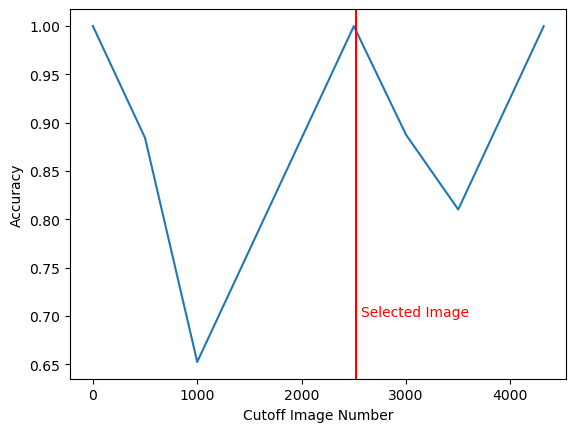

In [9]:
plt.plot(cutoff_values, results)

plt.axvline(x=selected, color='r')
plt.text(selected+50, 0.7, 'Selected Image', color='red')

plt.xlabel('Cutoff Image Number')
plt.ylabel('Accuracy')
plt.show()

## Question: Why is there no validation set?

Answer:
- Traditionally, train/val/test splits are used to adjust hyperparameters, prevent overfitting, and increase test accuracy.
- However, in this case, we intentionally want the model to be confused, as the data is inherently confusing to our model.
- Our goal is to have the model be sufficiently confused in order to identify the phase transition, making a validation set unnecessary for this specific experiment.

## Question:
Does the plot match what you were expecting? Why or why not?



## Explanation

The middle peak of highest accuracy at the transition point makes sense, but what's up with the 100% accuracy at the ends? It all comes down to probability. 

When the cutoff value is at its extremes, it labels every image the same way, so the data itself doesn't even matter. For example, if the cutoff was image number 10/4320, the model can blindly label all of the images as taking place after the transition, and it will still be 99.8% accurate. Then, as the cutoff shifts away from the extremes, the model accuracy dips because it's basically just guessing - which is exactly what you'd expect from a probabilistic standpoint. 

Once the cutoff approaches the transition point and there is a distinct, learnable difference in the images before and after, the model will stop guessing and begin to improve. 

### Task 1: Change the number of points on the plot

Optional Task: Determine more precisely the transition image and view it below

### Plot Average Pixel Intensity



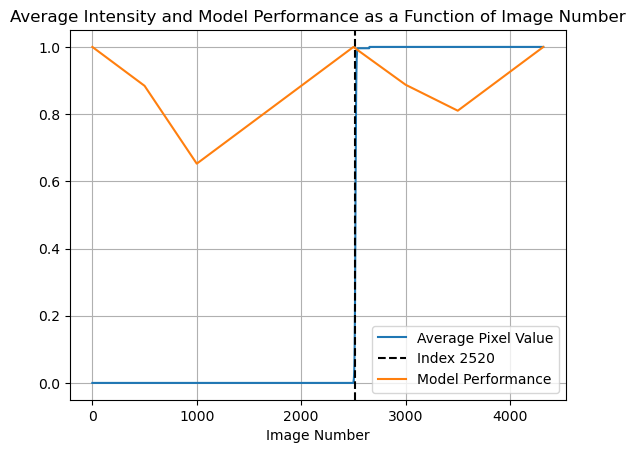

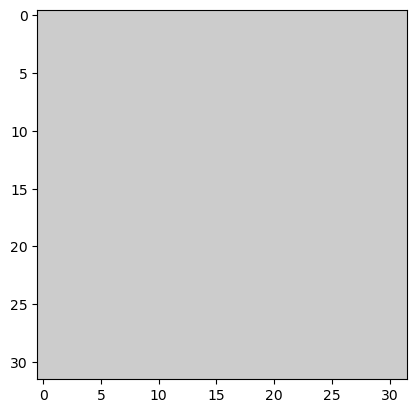

In [10]:
average_intensity = np.mean(sigmoid_pictures, axis=(1, 2))/255
average_intensity.shape  # should be (4320, 3)

plt.plot(average_intensity[:,0], label=f'Average Pixel Value')
plt.axvline(x=selected, color='k', linestyle='--', label=f'Index {selected}')  # Add vertical line for transition image
plt.plot(cutoff_values, results, label='Model Performance')
plt.title('Average Intensity and Model Performance as a Function of Image Number')
plt.xlabel('Image Number')
plt.legend()
plt.grid(True)
plt.show()

plt.imshow(sigmoid_pictures[2525])

# Part 2: Sunrise Data

### Load Data

In [11]:
data_path = "datasets/sunrise/Day1/sunrise32x32.npy"
sunrise_pictures = np.load(data_path)

print(sunrise_pictures.shape)

(4320, 32, 32, 3)


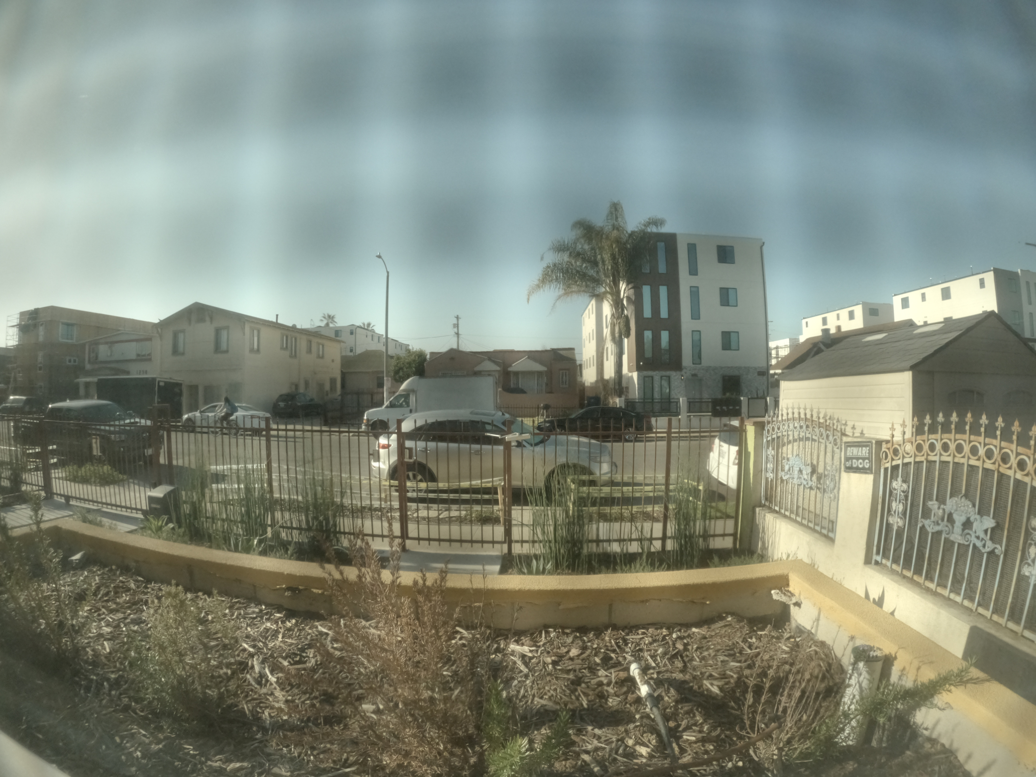

In [12]:
# Display Full Resolution Image

from IPython.display import display
from PIL import Image

image_path = "datasets/sunrise/a_sample_image.jpg"
original_image = Image.open(image_path)
scale_factor = 0.2
new_width = int(original_image.width * scale_factor)
new_height = int(original_image.height * scale_factor)
resized_image = original_image.resize((new_width, new_height))
display(resized_image)

### Explore Data

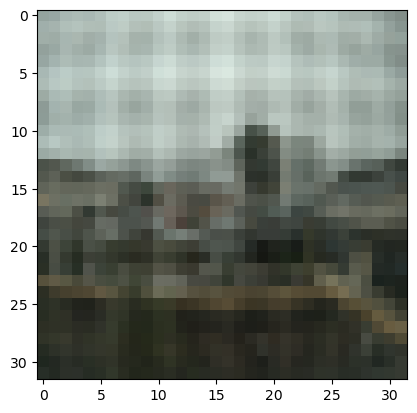

In [13]:
plt.imshow(sunrise_pictures[2400])

### Label Data

In [14]:
n = 4320
selected = 1620
labels = np.array([0]*selected + [1]*(n-selected))

### Get Network and Train

In [15]:
model = get_model()
model_log = model.fit(x=sunrise_pictures, y=labels, epochs=5)

Epoch 1/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8120 - loss: 7.0929
Epoch 2/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9273 - loss: 0.5133
Epoch 3/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9602 - loss: 0.1700
Epoch 4/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9337 - loss: 0.6437
Epoch 5/5
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9708 - loss: 0.1614


### Evaluate and Plot

In [16]:
performance = model.evaluate(sunrise_pictures, labels)
print(f"Cutoff Value: {idx}")
print(f"Accuracy: {performance[1]}")

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.9950 - loss: 0.0146    
Cutoff Value: 4319
Accuracy: 0.9949073791503906


### Question: Why is the accuracy so much higher now than before?

## Task 2: Translating Results

Translate image number to correspond to a time of day. Hint: Images in the data set are taken from midnight to 12 pm

In [17]:
print(f"Cutoff Time: {(selected / 4320)*12}")
print(f"Accuracy: {performance[1]}")

Cutoff Time: 4.5
Accuracy: 0.9949073791503906


### Reminder of Network Definition

In [18]:
def get_model():
  inputs = tf.keras.Input(shape=(32, 32, 3), name="simple_model")
  x0 = tf.keras.layers.Flatten()(inputs)
  x1 = tf.keras.layers.Dense(80, activation="relu")(x0)
  outputs = tf.keras.layers.Dense(1, name="predictions")(x1)  # linear activation!

  model = tf.keras.Model(inputs=inputs, outputs=outputs, name=f'Model')

  model.compile(
      optimizer=tf.keras.optimizers.Adam(),
      loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  return model

One cutoff point is not enough. Let's loop through multiple and observe our results

In [19]:
results = []
cutoff_values = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4319]
for idx in cutoff_values:
  print(f"*** Process Cutoff Picture {idx} ***")

  labels = np.array([0]*idx + [1]*(n-idx))                # create new labeling

  model = get_model()                                     # load fresh model
  model_log = model.fit(x=sunrise_pictures, y=labels, epochs=1)   # train the model

  print("Evaluating")

  performance = model.evaluate(sunrise_pictures, labels)          # evaluate performance
  results.append(performance[1])                          # save results


*** Process Cutoff Picture 0 ***
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9811 - loss: 0.5763
Evaluating
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 1.0000 - loss: 0.0000e+00
*** Process Cutoff Picture 500 ***
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.7236 - loss: 22.1388
Evaluating
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.5019 - loss: 0.5903
*** Process Cutoff Picture 1000 ***
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6985 - loss: 45.0729 
Evaluating
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.7138 - loss: 0.5914
*** Process Cutoff Picture 1500 ***
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.8029 - loss: 28.4687
Evaluating
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.8933 - loss: 0.9897    
*** Process Cutoff Picture 2000 ***
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8358 - loss: 34.9661
Evaluating
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.9966 - los

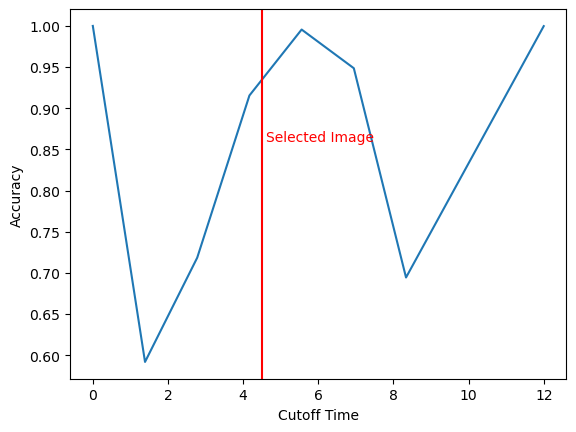

In [20]:
plt.plot(np.array(cutoff_values) * 12 / 4320, results)

plt.axvline(x=selected * 12 / 4320, color='r')
plt.text((selected * 12 / 4320)+.1, 0.86, 'Selected Image', color='red')

plt.xlabel('Cutoff Time')
plt.ylabel('Accuracy')
plt.show()

### Question: We know that a single transition exists, but we are not obtaining the clean W shape we saw before. What could be the issue?

## Task 3: Improve Results
Change network definition and model.fit parameters to improve results

## ANSWER
Change layer size from 80 to something smaller, like 20. Note that this is contradictory to how we normally attempt to improve neural networks. In our case, we want the model to be confused, so modifying the model to be more robust (e.g. more nodes or layers) will make our results too accurate to identify a transition. For example, if the model is too robust and can accurately identify when an image was taken, the accuracy will not peak at the transition point, but instead be consistently high for all cutoff points.

# Part 3: Augmentation

## Random Patching

### Import the same images with higher resolution

In [21]:
data_path = "datasets/sunrise/Day1/sunrise112x112.npy"
sunrise_pictures = np.load(data_path)
print(sunrise_pictures.shape)

(4320, 112, 112, 3)


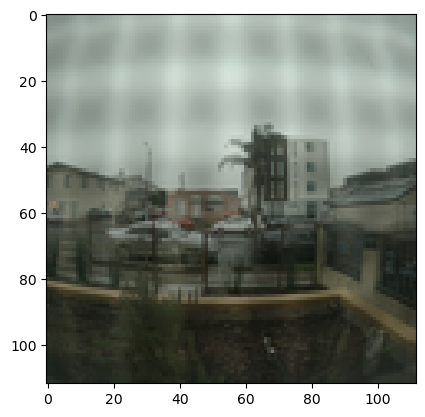

In [22]:
# looking at same image selected before
selected_image = sunrise_pictures[2500]
plt.imshow(selected_image)

In [23]:
# get random starting row and column from allowed values
import random
start_row = random.randint(0,112-32) # obtains an integer in range [0,79]
start_column = random.randint(0,112-32)

print((start_row, start_column))

(47, 12)


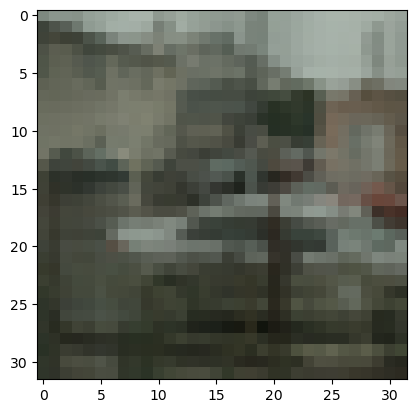

In [24]:
# get patch from full image as subset of array
subset_array = selected_image[start_row:start_row+32, start_column:start_column+32, :]
plt.imshow(subset_array)

In [25]:
# put in a for loop and make it a function
def get_patches(image):
  output = []

  # gets 3 patches
  for _ in range(3):

    # obtain integers in range [0,79]
    start_row = random.randint(0,112-32)
    start_column = random.randint(0,112-32)

    # get the patch as a subset of the image
    patch = image[start_row:start_row+32, start_column:start_column+32, :]

    output.append(patch)

  return output

patches = get_patches(selected_image)

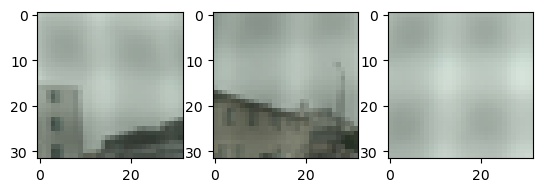

In [26]:
# view patched images
plt.subplot(1,3,1)
plt.imshow(patches[0])

plt.subplot(1,3,2)
plt.imshow(patches[1])

plt.subplot(1,3,3)
plt.imshow(patches[2])

In [27]:
# do random patching on all data
patched_image_list = []
for picture in sunrise_pictures:
  patches = get_patches(picture)

  patched_image_list.append(patches[0])
  patched_image_list.append(patches[1])
  patched_image_list.append(patches[2])

patched_image_data = np.array(patched_image_list)
print(patched_image_data.shape)

(12960, 32, 32, 3)


Notice how we have 3 times as much data now

In [28]:
# train (same process as before exactly)
n = 12960
results = []
cutoff_values = [0, 1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000, 12959]
for idx in cutoff_values:
  print(f"*** Process Cutoff Picture {idx} ***")

  # create new labeling
  labels = np.array([0]*idx + [1]*(n-idx))

  # load fresh model
  model = get_model()
  model_log = model.fit(x=patched_image_data, y=labels, epochs=1)

  print("Evaluating")

  performance = model.evaluate(patched_image_data, labels)          # evaluate performance
  results.append(performance[1])                          # save results


*** Process Cutoff Picture 0 ***
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9843 - loss: 2.0134
Evaluating
405/405 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 1.0000 - loss: 0.0000e+00
*** Process Cutoff Picture 1500 ***
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7951 - loss: 18.6099
Evaluating
405/405 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.6366 - loss: 19.9684
*** Process Cutoff Picture 3000 ***
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7070 - loss: 12.2725
Evaluating
405/405 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.5026 - loss: 2.2983
*** Process Cutoff Picture 4500 ***
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6982 - loss: 20.6223
Evaluating
405/405 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.8233 - loss: 0.6870
*** Process Cutoff Picture 6000 ***
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7768 - loss: 19.2248
Evaluating
405/405 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.4510 - loss: 5.9420

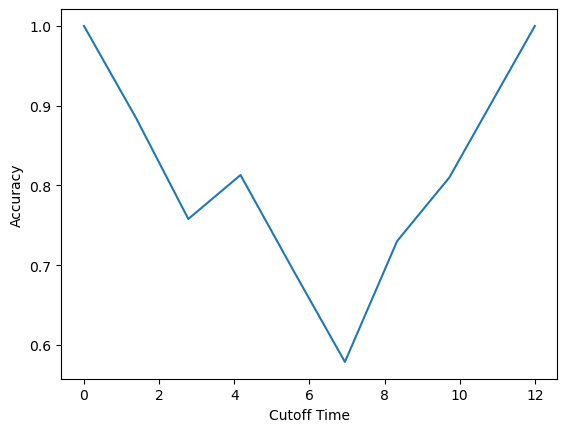

In [29]:
plt.plot(np.array(cutoff_values) * 12 / n, results)
plt.xlabel('Cutoff Time')
plt.ylabel('Accuracy')
plt.show()

## Optional Task
Implement a different data augmentation method such as rotation and train the network on it

#Optional Task

we have data taken from another day in the shared folder. Reformat the data to be saved into a single numpy array that can be used to train the models with the cutoff values.

Note: The pictures have already been shrunken down to 224x224 for storage convenience, but they still need to be rescaled

Hint: The intervals between pictures are the same as the previously used data, but the start time is 12:03 am

In [30]:
from PIL import Image
import numpy as np
import os

folder_num = 0
data_path = "datasets/sunrise/NewData"

arrays = []

count = 0

for i in range(19963, 23928):
  image_path = os.path.join(data_path, f'G00{i}.JPG')

  # Add here error handling in case there was no picture with a given name
  # e.g., G0020000.JPG is missing but you have G0019999.JPG and G0020001.JPG

  try:
    image = Image.open(image_path)
    image = image.resize((112,112))

    image_array = np.array(image)

    arrays.append(image_array)

  except:
    print(f"File {image_path} does not exist")
    count += 1

output = np.array(arrays)
np.save(os.path.join(data_path, 'sunrise112x112.npy'), output)

print()
print(f"Missing {count} images")

# Continue here

File datasets/sunrise/NewData/G0020000.JPG does not exist

Missing 1 images


In [31]:
#augment data
sunrise_pictures = np.load(os.path.join(data_path, 'sunrise112x112.npy'))
for picture in sunrise_pictures:
  patches = get_patches(picture)

  patched_image_list.append(patches[0])
  patched_image_list.append(patches[1])
  patched_image_list.append(patches[2])

patched_image_data = np.array(patched_image_list)
print(patched_image_data.shape)

(24852, 32, 32, 3)


In [32]:
#train
# n = 24852
n = patched_image_data.shape[0] # must change to output shape from previous cell
results = []
cutoff_values = [0, 1500, 3000, 4500, 6000, 7500, 9000, 10500, 11892]
for idx in cutoff_values:
  print(f"*** Process Cutoff Picture {idx} ***")

  # create new labeling
  labels = np.array([0]*idx + [1]*(n-idx))

  # load fresh model
  model = get_model()
  model_log = model.fit(x=patched_image_data, y=labels, epochs=1)

  print("Evaluating")

  # evaluate the performance
  performance = model.evaluate(patched_image_data, labels)

  # save the results
  results.append(performance[1])

*** Process Cutoff Picture 0 ***
777/777 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9907 - loss: 1.2146
Evaluating
777/777 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 1.0000 - loss: 0.0000e+00
*** Process Cutoff Picture 1500 ***
777/777 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8916 - loss: 7.4805
Evaluating
777/777 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.7599 - loss: 3.8381
*** Process Cutoff Picture 3000 ***
777/777 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8179 - loss: 10.6632
Evaluating
777/777 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.6132 - loss: 5.1516
*** Process Cutoff Picture 4500 ***
777/777 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7869 - loss: 18.8836
Evaluating
777/777 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.7105 - loss: 5.1927
*** Process Cutoff Picture 6000 ***
777/777 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7983 - loss: 18.7318
Evaluating
777/777 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.7705 - loss: 4.2835
*

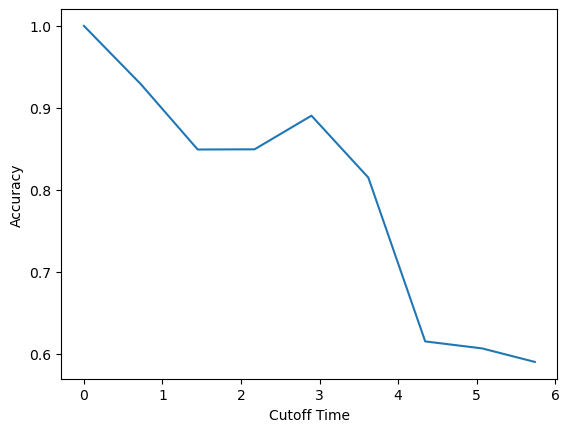

In [33]:
plt.plot(np.array(cutoff_values) * 12 / n, results)
plt.xlabel('Cutoff Time')
plt.ylabel('Accuracy')
plt.show()